# This notebook uses the NIST webbook to parameterize the L-V curve. 
- We fit a polynomial, so for any given homogenization T we can get the pressure, and if we know P and T we can get density

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('NistData_Critical.xlsx')

## Make the regression
- lets use a cubic spline

(3.0, 4.0)

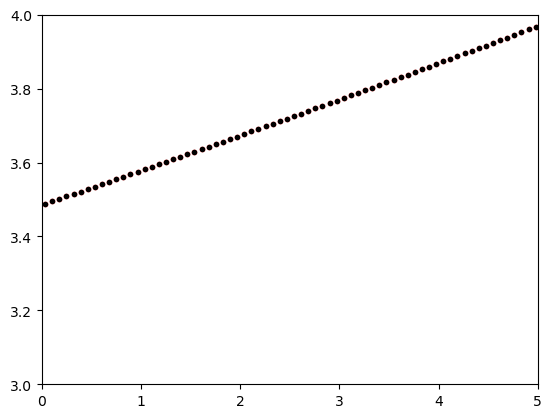

In [27]:
from scipy.interpolate import CubicSpline
import pandas as pd
spl=CubicSpline(data['Temperature (C)'], data['Pressure (MPa)'])
new_y=spl(data['Temperature (C)'])


plt.plot(data['Temperature (C)'], data['Pressure (MPa)'], '.r')
plt.plot(data['Temperature (C)'], Py, '.g', ms=1)
plt.plot(data['Temperature (C)'], new_y, '.k')
plt.xlim([0, 5])
plt.ylim([3, 4])

In [28]:
import pickle
with open('Phase_Boundary.pck', 'wb') as file_handle:
    pickle.dump(spl, file_handle)

In [29]:
with open('Phase_Boundary.pck', 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

## How big are the discrepencies

Text(0.5, 0, 'Temp (C)')

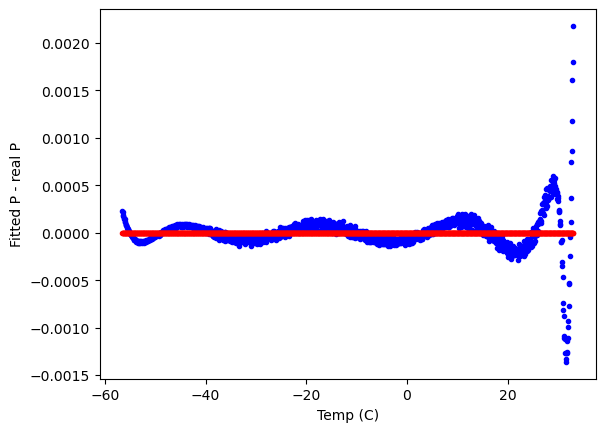

In [30]:
plt.plot(
         data['Temperature (C)'], 
    Py-data['Pressure (MPa)'], 
         '.b')
plt.plot(
         data['Temperature (C)'], 
    new_y-data['Pressure (MPa)'], 
         '.r')
plt.ylabel('Fitted P - real P')
plt.xlabel('Temp (C)')

In [ ]:
plt.plot(

In [31]:
import CoolProp.CoolProp as cp
def calculate_density_homog_T(T_C):
    P_MPa=my_loaded_model(T_C)
    # Need to check if its greater than PCrit
    PCrit=7.3773
    TCrit=30.9782
    
    print('T='+str(T_C))
    print('P='+str(P_MPa))
    P_Pa=P_MPa*10**6
    T_K=T_C+273.15
    Phase=cp.PhaseSI('P', P_Pa, 'T', T_K,'CO2')
    print('Phase coolprop says='+str(Phase))

    if P_MPa<PCrit and T_C<TCrit:
        Density_kgm3=cp.PropsSI('D', 'P|liquid', P_Pa, 'T', T_K, 'CO2')
 
    if P_MPa>PCrit and T_C<TCrit:
        Density_kgm3=cp.PropsSI('D', 'P|supercritical_liquid', P_Pa, 'T', T_K, 'CO2')
    if P_MPa<PCrit and T_C>=TCrit:
        Density_kgm3=cp.PropsSI('D', 'P|supercritical_gas', P_Pa, 'T', T_K, 'CO2')
    if P_MPa>PCrit and T_C>TCrit:
        Density_kgm3=cp.PropsSI('D', 'P|supercritical', P_Pa, 'T', T_K, 'CO2')
        
    Density_gcm3=Density_kgm3/1000
    
    return Density_gcm3
    

In [32]:
def loop_density_homog_T(T_C):
    Density=np.empty(len(T_C), dtype=float)
    if isinstance(T_C, pd.Series):
        T_C_np=np.array(T_C)
    for i in range(0, len(T_C)):
        Density[i]=calculate_density_homog_T(T_C[i])
    return Density
        

In [33]:
calculate_density_homog_T(T_C=27.8)

T=27.8
P=6.8605136050217865
Phase coolprop says=liquid


0.6598213829902363

In [22]:
0.63/0.66

0.9545454545454545

In [34]:
calculate_density_homog_T(T_C=-5.6)

T=-5.6
P=2.996023533572825
Phase coolprop says=gas


0.9595149936973022

In [23]:
0.9595/0.9288

1.0330534022394489

## Hectors was -5.6
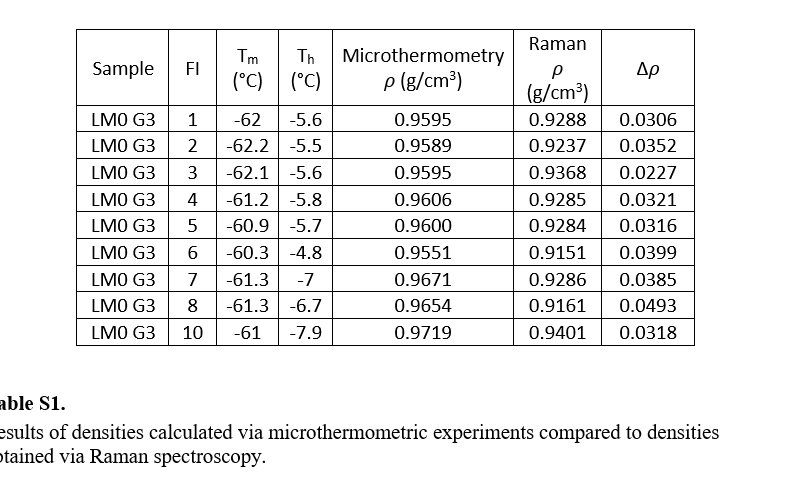!

In [6]:
#0.63-0.64g/cm3
import CoolProp.CoolProp as cp
Pressure_Pa=Pf_H/10**6
Temp_K=273.15-5.6     
Density_kgm3=cp.PropsSI('D', 'P|liquid', Pressure_Pa, 'T', Temp_K, 'CO2')
Density_gcm3=Density_kgm3/1000
Density_gcm3

NameError: name 'Pf_H' is not defined

In [10]:
x_C=27.8
Pf_C=Pf(x_C)
Pf_C

6.86306116880602

In [11]:
Pressure_Pa=Pf_C/10**6
Temp_K=273.15+x_C   
Density_kgm3=cp.PropsSI('D', 'P|liquid', Pressure_Pa, 'T', Temp_K, 'CO2')
Density_gcm3=Density_kgm3/1000
Density_gcm3

ValueError: Inputs in Brent [13491.667283,19487.963853] do not bracket the root.  Function values are [986285673400.996094,2148014658538.309570] : PropsSI("D","P|liquid",6.863061169e-06,"T",300.95,"CO2")

In [27]:
import CoolProp.CoolProp as cp
Pressure_Pa=Pf_H/10**6
Temp_K=273.15+0
Density_kgm3=cp.PropsSI('D', 'P|liquid', Pressure_Pa, 'T', Temp_K, 'CO2')
Density_gcm3=Density_kgm3/1000
Density_gcm3

0.8824365439750246

In [20]:
Density

5.925500270286429e-11

In [ ]:
Pressure=cp.PropsSI('P', 'D', 0.65*1000  , 'T', Temp_K, 'CO2')